
# **Watershed Algorithm for marker-based image segmentation**

1. How to use the Watershed algorithm for marker-based image segmentation


In [9]:
# Our Setup, Import Libaries, Create our Imshow Function
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 8):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

## Watershed Algorithm in OpenCV

The **Watershed Algorithm** is a segmentation technique used to separate objects in an image, especially when boundaries are unclear. It treats pixel intensities as a topographic map, where bright areas are peaks and dark areas are valleys.

### **How It Works:**
1. **Convert Image to Grayscale** – Helps in preprocessing.
2. **Apply Thresholding or Morphological Operations** – Creates binary markers for the foreground and background.
3. **Compute Distance Transform** – Helps distinguish object regions.
4. **Label Markers** – Assigns labels to different objects.
5. **Apply `cv2.watershed()`** – Expands boundaries to separate overlapping objects.

### **Key Concept:**
- Pixels are treated as elevations.
- Water "flows" from high-intensity regions into lower ones.
- The algorithm finds ridges (boundaries) between different objects.

### **Use Cases:**
✔ **Medical Imaging (Cell Segmentation)**  
✔ **Object Separation in Overlapping Regions**  
✔ **Scene Understanding in Computer Vision**  

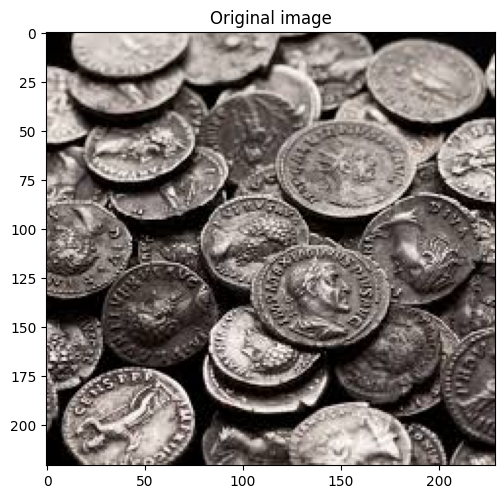

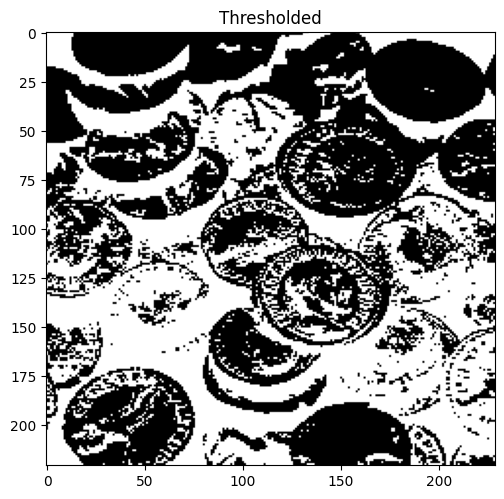

In [4]:
# Load image
img = cv2.imread('coins.jpeg')
imshow("Original image", img)

# Grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold using OTSU
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

imshow("Thresholded", thresh)

### Noise Removal & Segmentation Preparation

This code processes an image to remove noise and separate foreground, background, and unknown regions for segmentation.

1. **Noise Removal:**
   - Uses **morphological opening** (`cv2.MORPH_OPEN`) to remove small noise.
   
2. **Sure Background Extraction:**
   - Applies **dilation** to strengthen background regions.

3. **Sure Foreground Extraction:**
   - Computes the **distance transform** to identify distinct objects.
   - Uses thresholding to isolate **sure foreground** regions.

4. **Unknown Region Identification:**
   - Subtracts the foreground from the background to mark **uncertain regions**.

The processed images (`SureFG`, `SureBG`, `unknown`) help refine object segmentation in later steps.


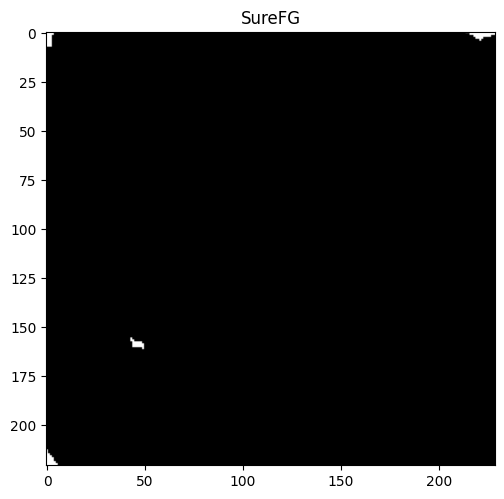

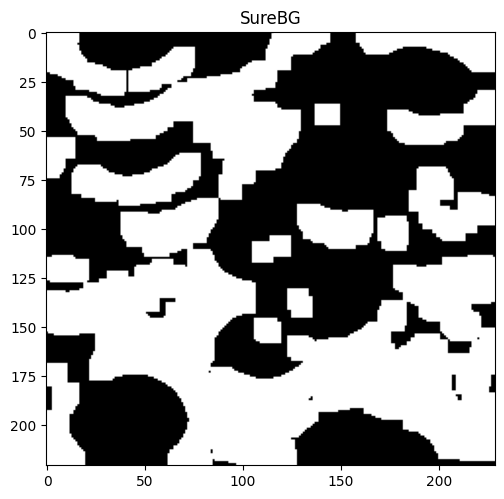

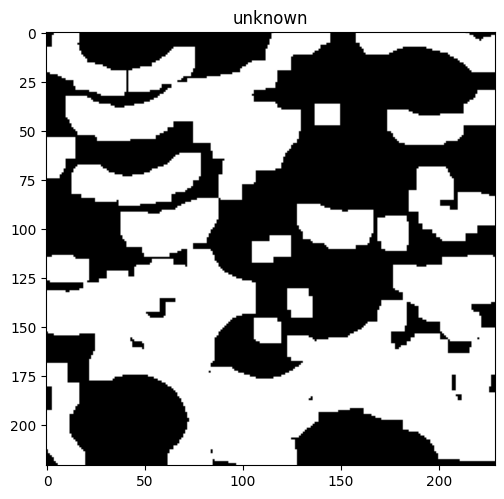

In [5]:
# noise removal
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

imshow("SureFG", sure_fg)
imshow("SureBG", sure_bg)
imshow("unknown", unknown)

### Marker Labelling in Image Segmentation

This code performs connected component labeling and applies the **watershed algorithm** to segment an image. The steps include:

1. **Connected Component Analysis:** Identifies distinct regions in a binary image.
2. **Label Adjustment:** Ensures background is labeled correctly.
3. **Unknown Region Handling:** Marks uncertain areas with `0` to be processed by the watershed algorithm.
4. **Watershed Segmentation:** Separates objects using image gradients.
5. **Boundary Marking:** Highlights segmentation boundaries in blue (`[255, 0, 0]`).

The final segmented image is displayed with boundaries clearly defined.


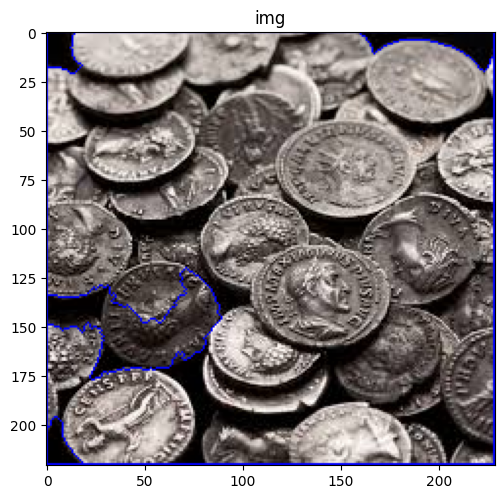

In [7]:
# Marker labelling
# Connected Components determines the connectivity of blob-like regions in a binary image.
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

imshow("img", img)

trying on a clearer picture of coins

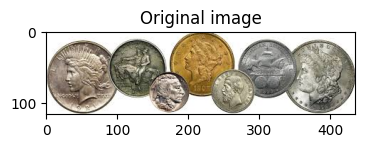

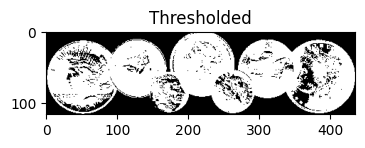

In [12]:
img = cv2.imread('coins2.jpeg')
imshow("Original image", img, 15)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

imshow("Thresholded", thresh, 15)

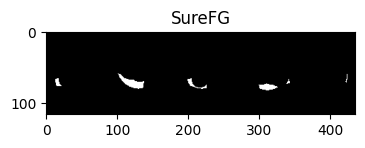

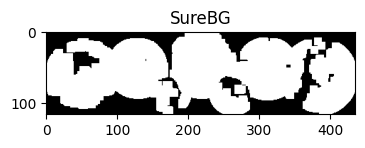

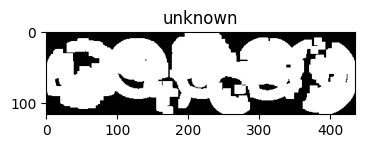

In [15]:
# noise removal
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

imshow("SureFG", sure_fg, 15)  # white - foreground
imshow("SureBG", sure_bg, 15)  # black - background
imshow("unknown", unknown, 15) # white - unknown

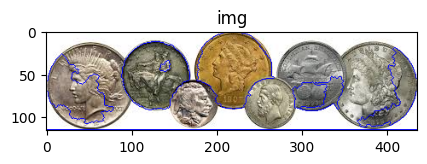

In [17]:
ret, markers = cv2.connectedComponents(sure_fg)

markers = markers+1
markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

imshow("img", img, 18)